# Set up

Prior to Python, I had only used R, so I was surprised to learn that you need to import libraries for routine tasks like handling a dataframe, doing vectorized math, and data visualization. This is what we are doing below.

In [1]:
# Standard data science libraries
# Used for dataframes
import pandas as pd
# Used for doing math
import numpy as np
# Used for visualization
import matplotlib.pyplot as plt

# Making the plot show within our notebook
%matplotlib inline

# Allowing us to set the plot size
import pylab
pylab.rcParams['figure.figsize'] = (10, 10)

This makes Python read our data table

In [2]:
# Importing the csv
climate_essay_df = pd.read_csv('data_noID.csv')

# How many rows are there?
print("There are %0.6f rows in the data set" % len(climate_essay_df))

# Let's view the first 5 rows
climate_essay_df.head()

There are 1793.000000 rows in the data set


,trt,us,kids,check,age,state,reg,zip,inc,vote,...,clim_af_std,clim_k,parent.resp,pers.df,wld.df,alt.resp,alt.resp.v2,guilt,effic,archive
0,1,1.0,1.0,1.0,35.0,Pennsylvania,Middle Atlantic,15024.0,30.0,0.0,...,0.690954,1.073489,0.968231,1.155801,0.611503,0.964798,0.965284,1.833968,0.883652,1.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.275072,0.317804,0.968231,1.155801,0.611503,0.964798,0.965284,0.950708,0.883652,0.0
2,1,1.0,1.0,1.0,42.0,Iowa,West North Central,52314.0,30.0,1.0,...,-2.220221,-1.571410,-1.171854,-0.867705,-0.530012,-1.244000,-2.226428,-0.815813,-0.698858,1.0
3,0,1.0,1.0,1.0,50.0,Missouri,West North Central,63349.0,30.0,0.0,...,0.275072,1.073489,0.968231,1.155801,0.611503,-0.139601,-0.098620,-0.815813,0.883652,1.0
4,1,1.0,1.0,1.0,35.0,North Carolina,South Atlantic,27030.0,12.5,-1.0,...,0.275072,0.695646,0.968231,1.155801,0.611503,0.964798,0.965284,0.950708,0.883652,1.0


That's a lot of columns to deal with...

# Exploratory Data Analysis

What does this text look like? Well it's stored in the `essay` column, so let's view a random entry

In [3]:
random_row = np.random.choice(len(climate_essay_df))

climate_essay_df['essay'][random_row]

'I can learn how to reduce waste and recycle. I think learning about composting would help as well. I need to find ways to reduce my use of energy in my home by having a study done. I also want to switch to reusable grocery bags.'

Let's figure out how many words people wrote for the essays

In [4]:
# Creating an empty vector to store word counts in
word_counts_list = []

# For-looping over all the rows
for row in range(len(climate_essay_df)):
    # Storing the text from each row
    sentence = climate_essay_df['essay'][row]
    # Splitting the string vector into a list of individual words
    words = sentence.split()
    # Getting the length of that list
    word_count = len(words)
    # Appending that to our growing list
    word_counts_list.append(word_count)

Plot the word counts

(array([ 55., 544., 712., 313., 111.,  33.,  10.,   8.,   6.,   1.]),
 array([  1. ,  64.3, 127.6, 190.9, 254.2, 317.5, 380.8, 444.1, 507.4,
        570.7, 634. ]),
 <a list of 10 Patch objects>)

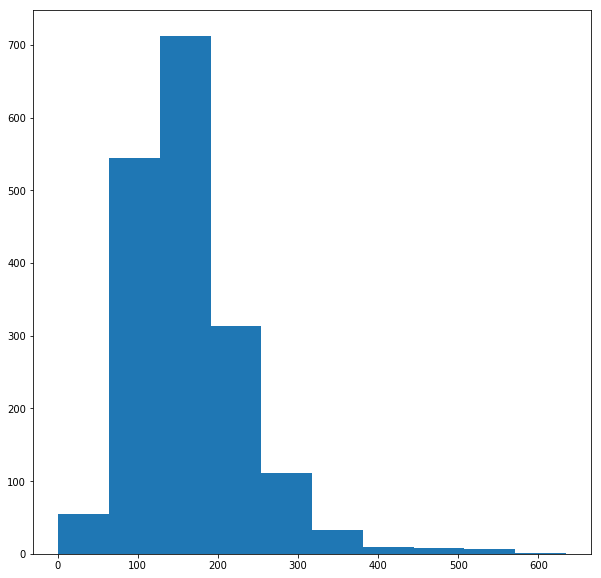

In [5]:
# View the distribution of word counts within essays
plt.hist(word_counts_list)

That's kind of ugly, and what's up with all those arrays and numbers?
<br>Let's clean this up a little bit

The average number of words written is 163.706079


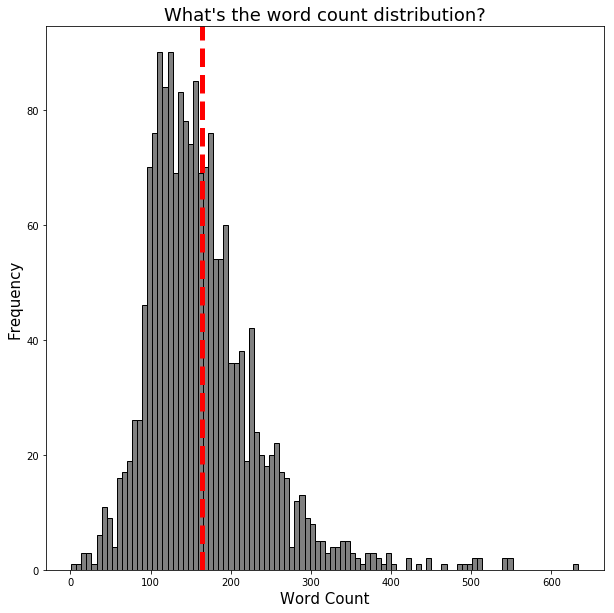

In [6]:
average_word_count = np.mean(word_counts_list)
print('The average number of words written is %0.6f' % average_word_count)

plt.hist(word_counts_list, bins = 100, color = 'grey', edgecolor = 'black')
plt.xlabel('Word Count', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("What's the word count distribution?", fontsize = 18)
plt.axvline(x = average_word_count, lw = 5, color = 'red', linestyle = '--');

# Text Processing

Some additional library importing

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

Some data conversion
<br>The essays are currently in a Panda's DataFrame column, it would be more reasonable to have them as a vector (`np.ndarray`) of strings. This data structure carries less formatting and is more generalizable than a data frame column.

In [8]:
# Converting the Panda's formal dataframe column into a standard vector of strings
essays = climate_essay_df['essay'].values

essays[0]

"Dear Adelyn, \n Today is January 7, 2015. I know that by now you are 37 years old and probably raising your own family. I may/or may not be around at this time to see that you get this letter. You are probably aware of the risks and challenges of climate change. Today I have a few thoughts that I wish to share with you about changes I have made, as well as those I will make in the next few years, to help clean up the earth and help it's ability to heal and become more stable.\n\nOne contribution I have made is switching to energy efficient light bulbs throughout the house. I have always been one to turn off all light and electronics when they are not in use. I am sure you will remember this pet peeve of mine, just as your brother and sister do. I do not let water run any longer than I have to, before turning it off. I tend to repurpose things by making crafts, and gifts from old materials, and pass down old clothing, to your cousins, rather than letting things pile up in landfills. \n

Let's get a count of words

In [9]:
word_counter = CountVectorizer()

count_of_words = word_counter.fit_transform(essays)
count_of_words

<1793x9724 sparse matrix of type '<class 'numpy.int64'>'
	with 171581 stored elements in Compressed Sparse Row format>

What in the world is that?
<br>Because most words won't be present in any given paragraph, the resulting word counts are mostly zeros. Since it's mostly empty, it's nice to prevent printing out nearly 10,000 zeros, so it is stored as a sparse matrix. We can try to inspect it, but, in reality, it's too much, as shown below.

In [10]:
count_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Well, how can we trust this?
<br>We can inspect the attributes that this `word_counter` has learned

In [11]:
print(word_counter.get_feature_names()[0:10])
print(word_counter.get_feature_names()[-10:])
print("\nIn total, it learned %0.6f words" % len(word_counter.get_feature_names()))

['00', '000', '002', '00am', '00pm', '01', '02', '0530', '0615', '0640']
['zach', 'zayna', 'zen', 'zero', 'ziplock', 'zones', 'zoo', 'zoom', 'zumba', 'zzzzzzzzzzz']

In total, it learned 9724.000000 words


What are the individual word counts?

In [12]:
word_counter.vocabulary_

{'dear': 2263,
 'adelyn': 331,
 'today': 8766,
 'is': 4750,
 'january': 4790,
 '2015': 79,
 'know': 4926,
 'that': 8633,
 'by': 1289,
 'now': 5918,
 'you': 9699,
 'are': 635,
 '37': 115,
 'years': 9685,
 'old': 6016,
 'and': 536,
 'probably': 6752,
 'raising': 6967,
 'your': 9704,
 'own': 6185,
 'family': 3348,
 'may': 5405,
 'or': 6072,
 'not': 5898,
 'be': 906,
 'around': 659,
 'at': 720,
 'this': 8681,
 'time': 8741,
 'to': 8760,
 'see': 7670,
 'get': 3818,
 'letter': 5084,
 'aware': 796,
 'of': 5993,
 'the': 8638,
 'risks': 7443,
 'challenges': 1474,
 'climate': 1635,
 'change': 1480,
 'have': 4110,
 'few': 3426,
 'thoughts': 8691,
 'wish': 9582,
 'share': 7757,
 'with': 9585,
 'about': 213,
 'changes': 1483,
 'made': 5292,
 'as': 679,
 'well': 9481,
 'those': 8685,
 'will': 9547,
 'make': 5315,
 'in': 4457,
 'next': 5839,
 'help': 4167,
 'clean': 1611,
 'up': 9145,
 'earth': 2834,
 'it': 4771,
 'ability': 206,
 'heal': 4132,
 'become': 928,
 'more': 5665,
 'stable': 8141,
 'one': 